In [4]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [12]:
cpg_folder = "../../../XRM/CPG200_PS239k_10min/"

In [13]:
tensor = np.load(os.path.join(cpg_folder, "cpg_rotated.npy"))

In [14]:
np.max(tensor)

47872.0

In [15]:
def normalize(tensor):
    tensor = tensor.copy().astype(np.float)
    tensor -= np.min(tensor)
    tensor /= np.max(tensor)
    return tensor

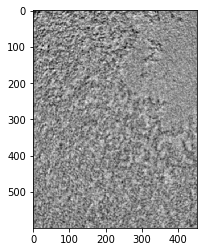

In [16]:
plt.imshow(normalize(tensor[300,200:800,:]), cmap="gray")

In [33]:
from scipy.ndimage import median_filter as median_filter
from scipy.ndimage import minimum_filter as minimum_filter

from scipy.ndimage import gaussian_filter

In [182]:
from scipy.ndimage.morphology import grey_erosion

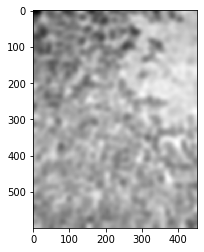

In [228]:
im = tensor[300,200:800,:]
im = grey_erosion(im, 5)


im = normalize(gaussian_filter(minimum_filter(
    gaussian_filter(im, 5), 5), 5))


def standardize(x):
    x = x-np.mean(x)
    return x/np.std(x)

def sigmoid(z, power = 3):
    z = 1/(1 + np.exp(-(standardize(z)*power)) )
    return z

plt.imshow(normalize(im), cmap="gray")

In [44]:
from PIL import Image

In [45]:
def save_image(path, tensor):
    tensor = normalize(tensor)
    tensor = np.array(tensor*255, dtype = np.uint8)
    Image.fromarray(tensor).save(path)

In [46]:
def save_texture_sample(root, idx, tensor):
    np.save(os.path.join(root, str(idx) + ".npy"), tensor)
    save_image(os.path.join(root, str(idx) + ".png"), tensor)
    if not os.path.isfile(os.path.join(root, str(idx) + "_labeled"+".png")):
        save_image(os.path.join(root, str(idx) + "_labeled"+".png"), tensor)

In [47]:
save_texture_sample("texture_samples/", 1, tensor[10,200:800,:])

In [48]:
save_texture_sample("texture_samples/", 2, tensor[300,200:800,:])

# Load labeled data

In [49]:
texture_folder = "texture_samples/"

In [50]:
indices = [int(i.split(".")[0]) for i in os.listdir(texture_folder) if ".npy" in i]

In [51]:
empty_textures = []
images = []

In [52]:
for i in indices:
    array = np.load(os.path.join(texture_folder, str(i)+".npy"))
    mask = np.array(Image.open(os.path.join(texture_folder, str(i)+"_labeled.png")))
    mask = mask == [255, 255, 255, 255]
    mask = mask[:,:,0]
    empty_textures.append(mask)
    images.append(array)

In [53]:
from sklearn.feature_extraction.image import extract_patches_2d

In [54]:
source_patches = extract_patches_2d(images[0], (50,50))

In [55]:
source_patches = normalize(source_patches)

In [56]:
target_patches = extract_patches_2d(empty_textures[0], (50,50))

In [57]:
def shuffle_in_unison(a, b):
    rng_state = np.random.get_state()
    np.random.shuffle(a)
    np.random.set_state(rng_state)
    np.random.shuffle(b)
    return a, b

In [58]:
#source_patches, target_patches = shuffle_in_unison(source_patches, target_patches)

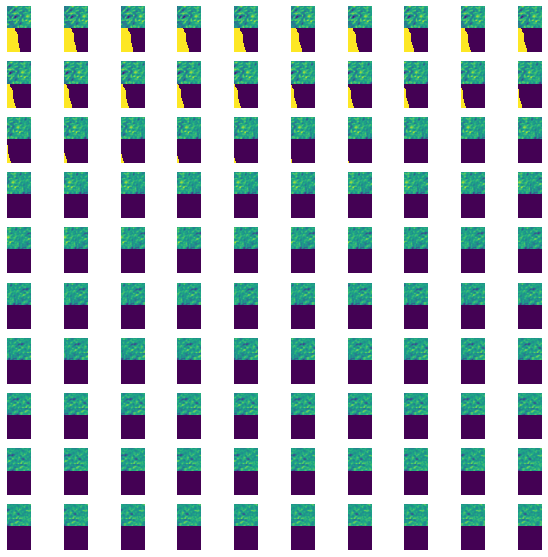

In [59]:
fig, ax = plt.subplots(10,10, figsize=(10,10))
iteration = 0
for i in range(10):
    for j in range(10):
        ax[i,j].imshow(np.vstack([source_patches[iteration], 
                                 target_patches[iteration]]), vmin=0, vmax= 1)
        ax[i,j].axis('off')
        iteration += 1

In [60]:
labels = target_patches[:,target_patches.shape[1]//2, target_patches.shape[2]//2]

In [61]:
import pathlib

In [62]:
dataset_folder = "texture_datasets"

In [63]:
pathlib.Path(dataset_folder).mkdir(parents=True, exist_ok=True) 

In [64]:
np.save(os.path.join(dataset_folder,"labels"),  labels)

In [65]:
np.save(os.path.join(dataset_folder, "source_patches"), source_patches)

In [66]:
np.save(os.path.join(dataset_folder, "target_patches"), target_patches)

In [67]:
len(labels)

222053

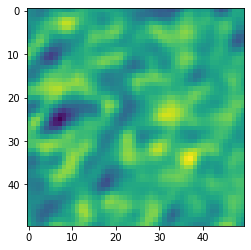

In [68]:
plt.imshow(source_patches[10])

In [69]:
print(labels[42])

False
